In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from create_input.lmp.info_from_lmp_out import LammpsLogParser
from scf.qelattice import get_qel

In [11]:
hartree2ev = 27.2114
summary_df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/gaussian/Si/comparison_of_basis_set_and_spin_summary.csv')

summary_df['6-31G'] = summary_df['6-31G'] + (289.198876197 * hartree2ev * 2)
summary_df['6-311G'] = summary_df['6-311G'] + (289.223331428 * hartree2ev * 2)
summary_df['6-311Gdp'] = summary_df['6-311Gdp'] + 15739.808470

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_51979/1722415112.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


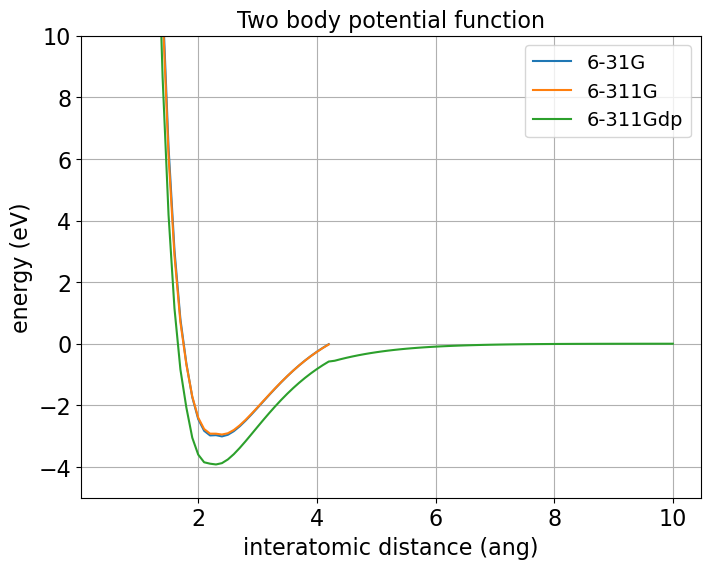

In [12]:
fs = 16

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

ax.plot(summary_df['distance'], summary_df['6-31G'], label='6-31G')
ax.plot(summary_df['distance'], summary_df['6-311G'], label='6-311G')
ax.plot(summary_df['distance'], summary_df['6-311Gdp'], label='6-311Gdp')


ax.set_title('Two body potential function', fontsize=fs)
ax.set_xlabel('interatomic distance (ang)', fontsize=fs)
ax.set_ylabel('energy (eV)', fontsize=fs)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid()
ax.legend(fontsize=14)

ax.set_ylim(-5, 10)
# ax.set_ylim(-50, 500)

fig.show()

In [13]:
from scipy.optimize import curve_fit

In [14]:
# fit_ga_df = summary_df.query('distance < 1.7')
fit_ga_df = summary_df.query('distance < 1.0')

In [15]:
fit_ga_df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/gaussian/Si/6-311G_dp_detail/ga_energy.csv')
fit_ga_df['6-311Gdp'] = fit_ga_df['energy_eV'] + 15739.808470

In [16]:
fit_ga_df = fit_ga_df[['distance', '6-311Gdp']]

In [17]:
distance = fit_ga_df['distance'].values
energy = fit_ga_df['6-311Gdp'].values

In [18]:
def ga(x, Z, a, b):
    return (Z**2 / x**3) + a / x ** 2 + b / x

def ga_func(x, param):
    return (param[0]**2 / x**3) + param[1] / x ** 2 + param[2] / x

param, cov = curve_fit(ga, distance, energy)

In [19]:
energy_fit = [ga_func(x, param) for x in distance]

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_51979/2662158343.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


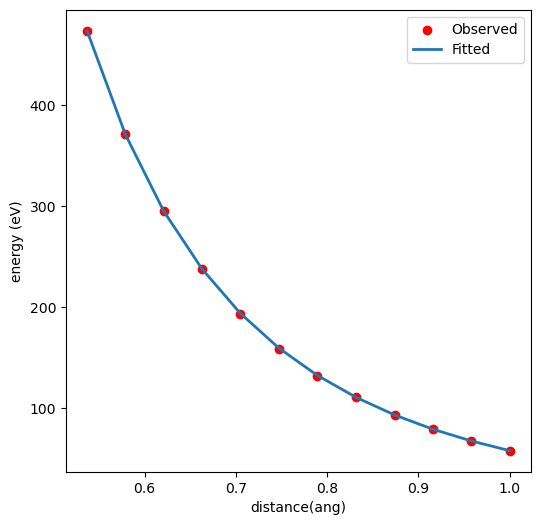

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.scatter(distance, energy, label='Observed', color='red')
ax.plot(distance, energy_fit, label='Fitted', linewidth=2)

ax.set_xlabel('distance(ang)')
ax.set_ylabel('energy (eV)')
# ax.set_ylim(0, 100)

ax.legend()
fig.show()

In [21]:
param

array([  9.45897406, -27.47400958,  -4.50065353])